<a href="https://colab.research.google.com/github/KodumuruRaja/Instance-Based-Algorithms/blob/main/Support-Vector-Machine3-(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/cell_samples.csv")

In [ ]:
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
data.shape

(699, 11)

In [ ]:
data.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [ ]:
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [ ]:
benign=data[data['Class']==2]
malignant=data[data['UnifSize']==4]

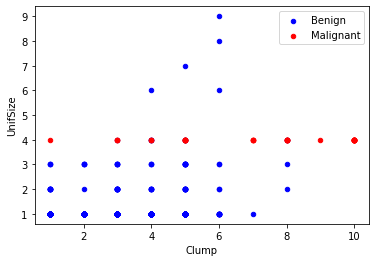

In [ ]:
axes=benign.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign')
malignant.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Malignant',ax=axes)

In [ ]:
# Identify unwanted rows
data.dtypes
data=data[pd.to_numeric(data['BareNuc'],errors='coerce').notnull()]
data['BareNuc']=data['BareNuc'].astype('int')
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [ ]:
# Remove unwanted columns
data.columns
data_features=data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x=np.asarray(data_features)
y=np.asarray(data['Class'])

In [ ]:
# Train, Test, Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
x_train.shape,x_test.shape

((546, 9), (137, 9))

In [ ]:
# Modelling SVM
from sklearn import svm
model=svm.SVC(kernel='linear',gamma='auto',C=2)
model.fit(x_train,y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           2       1.00      0.94      0.97        90\n           4       0.90      1.00      0.95        47\n\n    accuracy                           0.96       137\n   macro avg       0.95      0.97      0.96       137\nweighted avg       0.97      0.96      0.96       137\n'

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9635036496350365